In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora, models
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/tom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
df= pd.read_csv('nos_keywords_hittegolf.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(subset=['text'] ,inplace=True)
print(df.shape)
df.head()

(1439, 8)


,title,url,date,tag,collections,text,subheadings,image_urls
0,Zuid-Franse druiven groeien door klimaatverand...,https://nos.nl/artikel/2481980-zuid-franse-dru...,2023-07-08,NaN,['Economie'],Tegen de heuvels rond Maastricht werden vijfti...,['Einde aan uienteelt'],['https://cdn.nos.nl/image/2023/07/08/985272/1...
1,"Steeds meer mensen een airco, maar experts zie...",https://nos.nl/artikel/2481925-steeds-meer-men...,2023-07-07,NaN,['Binnenland'],Op hete dagen zijn mobiele airco's in winkels ...,NaN,['https://cdn.nos.nl/image/2023/07/07/985126/1...
2,Hofplein in Rotterdam op de schop: minder auto...,https://nos.nl/artikel/2479795-hofplein-in-rot...,2023-06-21,NaN,"['In samenwerking met', 'Rijnmond', 'Regionaal...",Het Hofplein in het centrum van Rotterdam gaat...,['Kosten hoger dan verwacht'],['https://cdn.nos.nl/image/2023/06/21/980329/1...
3,'Klimaatverandering kan desastreuze gezondheid...,https://nos.nl/artikel/2477696-klimaatverander...,2023-06-04,Klimaat,"['Collectie', 'Klimaat', 'Binnenland', 'Buiten...",Dat klimaatverandering kan leiden tot bijvoorb...,"['Directe en indirecte gevolgen', ""'Toch wel e...",['https://cdn.nos.nl/image/2023/06/04/975519/1...
4,"Varkens in slachthuizen lijden onnodig, NVWA g...",https://nos.nl/nieuwsuur/artikel/2471637-varke...,2023-04-16,NaN,"['Nieuwsuur', 'Binnenland']",Vanaf volgend jaar gaat de overheid optreden t...,"['Vechten', 'Hittestress']",['https://cdn.nos.nl/image/2023/04/16/961199/1...


In [65]:
def collection_to_list(collections):
    if isinstance(collections, str):
        collection_list = eval(collections)
        if 'Binnenland' in collection_list:
            return True
        else:
            return False

df['Binnenland'] = df['collections'].apply(collection_to_list)

In [66]:
df['Binnenland'].value_counts()

Binnenland
False    722
True     702
Name: count, dtype: int64

In [67]:
df_binnenland = df[df['Binnenland'] == True]
print(df_binnenland.shape)
df_buitenland = df[df['Binnenland'] == False]
print(df_buitenland.shape)

(702, 9)
(722, 9)


In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel

lemmatizer = WordNetLemmatizer()
custom_stopwords = set(['temperaturen', 'graden', 'jaar', 'we', 'mensen', 'zegt', 'wel', 'gaat', 'wk', 'uur', 'weer', 'nederland', 'gaan', 
                         'volgens', 'heel', 'komt', 'hitte', 'temperatuur', 'hittegolf'])

def preprocess_text(text):
    stop_words = set(stopwords.words('dutch'))
    lemmatizer = WordNetLemmatizer()
    
    text = str(text)
    text = text.lower()

    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words and token not in custom_stopwords and token.isalpha()]
    
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]

    return lemmatized

# YOUR CODE HERE
texts = df_binnenland['text'].tolist()
processed_texts = [preprocess_text(text) for text in texts]
print(processed_texts[0])

dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

tfidf_model = models.TfidfModel(corpus=corpus)
corpus_tfidf = tfidf_model[corpus]

print(f"The corpus contains {len(corpus)} documents and {len(dictionary)} unique tokens.")

['hete', 'dagen', 'mobiele', 'airco', 'winkels', 'slepen', 'steed', 'nemen', 'vaste', 'airco', 'huis', 'totaal', 'procent', 'huishoudens', 'vaste', 'mobiele', 'airco', 'procent', 'overweegt', 'schaffen', 'blijkt', 'allemaal', 'recente', 'cijfers', 'voorlichtingsbureau', 'milieu', 'centraal', 'voornaamste', 'redenen', 'airco', 'nemen', 'beter', 'slapen', 'nachts', 'aantal', 'vaste', 'neemt', 'gestaag', 'toe', 'lieten', 'airco', 'installeren', 'vorig', 'kwamen', 'ruim', 'blijkt', 'cijfers', 'cbs', 'verkoop', 'mobiele', 'airco', 'willen', 'winkels', 'precieze', 'aantallen', 'geven', 'zeggen', 'enorme', 'stijging', 'zien', 'airco', 'verkocht', 'woordvoerder', 'mediamarkt', 'saturn', 'milieu', 'centraal', 'groot', 'voorstander', 'airco', 'organisatie', 'waarschuwt', 'kosten', 'klimaatschade', 'hoge', 'energiegebruik', 'apparaten', 'mobiele', 'airco', 'verbruikt', 'twintig', 'keer', 'stroom', 'bijvoorbeeld', 'ventilator', 'stroomverbruik', 'uitstoot', 'verschillende', 'koelapparaten', 'aanko

In [78]:
num_topics = 20
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics)

In [79]:
# Extract topic distributions for each document 
doc_topics = [lda_model.get_document_topics(bow) for bow in corpus]

# extract word distribution for each topic
word_topics = lda_model.print_topics()

# word distribution within topics
for idx, topic in word_topics:
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.001*"blauwalg" + 0.001*"klaassen" + 0.001*"water" + 0.000*"uien" + 0.000*"energie" + 0.000*"aeb" + 0.000*"vissen" + 0.000*"steed" + 0.000*"regen" + 0.000*"goederentreinen"
Topic: 1 
Words: 0.001*"warmtenet" + 0.001*"kans" + 0.001*"vitens" + 0.001*"hennepkwekerijen" + 0.000*"bilt" + 0.000*"rapport" + 0.000*"gletsjers" + 0.000*"hittegolven" + 0.000*"opwarming" + 0.000*"ferroli"
Topic: 2 
Words: 0.001*"september" + 0.001*"bilt" + 0.001*"zware" + 0.001*"onweer" + 0.001*"dagen" + 0.001*"tropische" + 0.001*"zomerse" + 0.001*"waterdamp" + 0.001*"juli" + 0.001*"code"
Topic: 3 
Words: 0.001*"vulkaan" + 0.001*"weerbericht" + 0.000*"severin" + 0.000*"henriquez" + 0.000*"mitch" + 0.000*"kerken" + 0.000*"hitteplan" + 0.000*"cot" + 0.000*"tijgermug" + 0.000*"ijs"
Topic: 4 
Words: 0.001*"bilt" + 0.001*"landelijke" + 0.001*"gemeten" + 0.001*"storm" + 0.001*"dennis" + 0.001*"container" + 0.001*"laboratoria" + 0.001*"rond" + 0.000*"warmer" + 0.000*"vandaag"
Topic: 5 
Words: 0.001*"dag

[{'Number of topics': 4, 'u_mass': -0.9620197557630068, 'c_v': 0.3256856244395763}, {'Number of topics': 6, 'u_mass': -0.9968491711454858, 'c_v': 0.33274515169199753}, {'Number of topics': 8, 'u_mass': -0.9871637994633989, 'c_v': 0.31177117521728315}, {'Number of topics': 10, 'u_mass': -0.9938672390573297, 'c_v': 0.32486531886503306}, {'Number of topics': 12, 'u_mass': -1.0168091607142893, 'c_v': 0.31320553935485956}, {'Number of topics': 14, 'u_mass': -1.0304638768531575, 'c_v': 0.3128321380986181}, {'Number of topics': 16, 'u_mass': -1.0277830990905041, 'c_v': 0.3244228784293877}, {'Number of topics': 18, 'u_mass': -1.045123179293221, 'c_v': 0.32033118938454214}, {'Number of topics': 20, 'u_mass': -1.0065815699243952, 'c_v': 0.3267267967579131}, {'Number of topics': 22, 'u_mass': -1.0476064895914918, 'c_v': 0.33184926516797897}, {'Number of topics': 24, 'u_mass': -1.0703467370185453, 'c_v': 0.32776522976795525}, {'Number of topics': 26, 'u_mass': -1.0651722213985964, 'c_v': 0.3276942

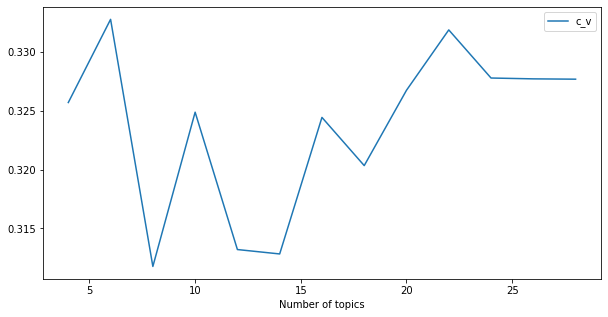

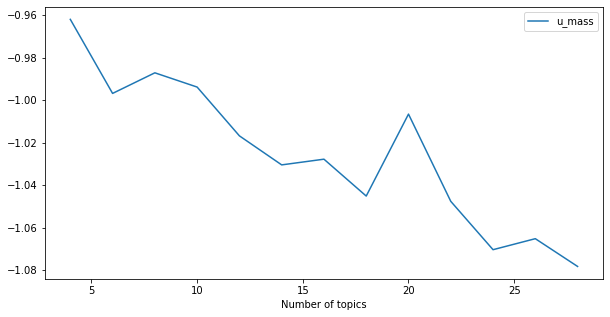

In [72]:
from gensim.models.coherencemodel import CoherenceModel

# Function to compute coherence score
def compute_coherence(dictionary, corpus, texts, limit, start, step):
    # YOUR CODE HERE
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        # topic model for num_topics
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(lda_model)
        
        u_mass = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass').get_coherence()
        c_v = CoherenceModel(model=lda_model, texts=texts, coherence='c_v').get_coherence()
        #c_uci = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_uci').get_coherence()
        #c_npmi = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_npmi').get_coherence()

        coherence_values.append({"Number of topics": num_topics, 
                                 "u_mass": u_mass, 
                                 "c_v": c_v, 
                                 #"c_uci": c_uci, 
                                 #"c_npmi": c_npmi
                                 })

    return model_list, coherence_values
    

# Applying the function to our dataset
model_list, coherence_values = compute_coherence(dictionary=dictionary, corpus=corpus, texts=processed_texts, start=4, limit=30, step=2)
print (coherence_values)

# Plotting coherence scores
# YOUR CODE HERE
coherence_df = pd.DataFrame(coherence_values)
coherence_df.plot(x="Number of topics", y=["c_v"], figsize=(10,5))
plt.show()
coherence_df.plot(x="Number of topics", y=["u_mass"], figsize=(10,5))
plt.show()